In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 
                     57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 
                     81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 
                     112635.00, 122391.00, 121872.00])

df = pd.DataFrame({'Experiencia':experiencia, 'Salario':salario})
df

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salario.isnull().sum()

0

In [4]:
experiencia.isnull().sum()

0

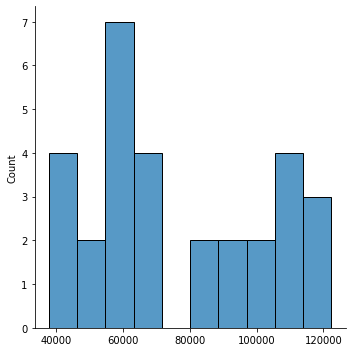

In [5]:
sns.displot(salario, bins=10)
plt.show()

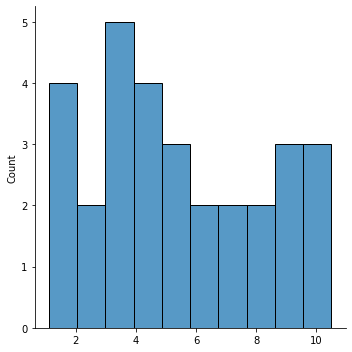

In [6]:
sns.displot(experiencia, bins=10)
plt.show()

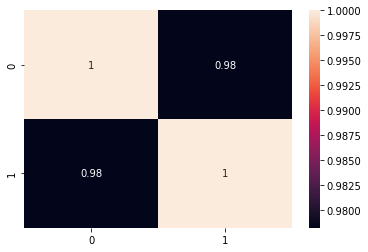

In [7]:
correlacion_matrix_salary = np.corrcoef(salario, experiencia)
sns.heatmap(data=correlacion_matrix_salary, annot=True)

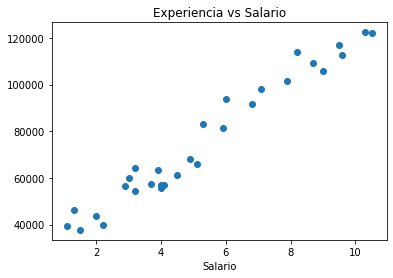

In [8]:
plt.scatter(experiencia, salario)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.xlabel('Salario')
plt.show()

In [9]:
print('Máximo Valor: {}'.format(salario.max()))
print('Mínimo Valor: {}'.format(salario.min()))
print('Mean Valor: {}'.format(salario.mean()))
print('Median Valor: {}'.format(salario.median()))
print('STD Valor: {}'.format(salario.std()))

Máximo Valor: 122391.0
Mínimo Valor: 37731.0
Mean Valor: 76003.0
Median Valor: 65237.0
STD Valor: 27414.4297845823


In [15]:
x_experiencia = experiencia
y_salario = salario
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_experiencia, y_salario, test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(24,)
(6,)
(24,)
(6,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
lin_model = LinearRegression()
#X_train = X_train.values.reshape(-1,1)
lin_model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score

In [21]:
#X_test = X_test.values.reshape(-1,1)
y_test_predict = lin_model.predict(X_test)

In [22]:
r2 = r2_score(y_test, y_test_predict)

In [27]:
print('Performance del modelo para el conjunto de test')
print('-----------------------------------------------')
print('R2 score: {}'.format(round(r2, 3)))

Performance del modelo para el conjunto de test
-----------------------------------------------
R2 score: 0.902


In [29]:
# y = mX + b
print('Coeficiente: ', lin_model.coef_)
print('Término independiente: ', lin_model.intercept_)

Coeficiente:  [9423.81532303]
Término independiente:  25321.583011776813


In [31]:
exp = experiencia.values.reshape(-1,1)
predicted_data_salario = lin_model.predict(exp)
predicted_data_salario[0:5]

array([35687.77986711, 37572.54293172, 39457.30599632, 44169.21365784,
       46053.97672244])

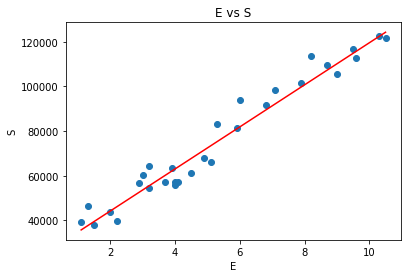

In [34]:
plt.scatter(experiencia, salario)
plt.plot(experiencia, predicted_data_salario, color = 'red')
plt.title('E vs S')
plt.xlabel('E')
plt.ylabel('S')
plt.show()

In [ ]:
df1 = pd.DataFrame({'Real': salario, 'Predicción': predicted_data_salario})
df1

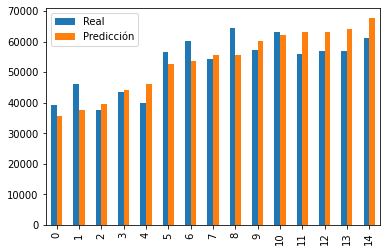

In [37]:
df1.head(15).plot(kind='bar')
plt.show()

In [48]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [49]:
dsBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [50]:
dfBoston = pd.DataFrame(dsBoston.data, columns=dsBoston.feature_names)
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
dfBoston.shape

(506, 13)

In [54]:
print(dsBoston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
dfBoston['MEDV'] = dsBoston.target
dfBoston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
dfBoston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

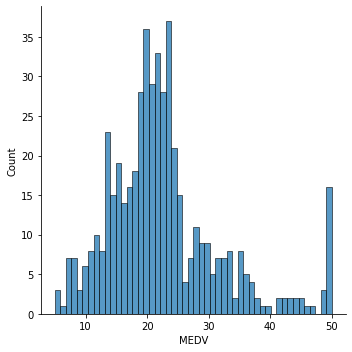

In [58]:
sns.displot(dfBoston['MEDV'], bins=50)
plt.show()

In [59]:
correlation_matrix_boston = dfBoston.corr().round(2)
correlation_matrix_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


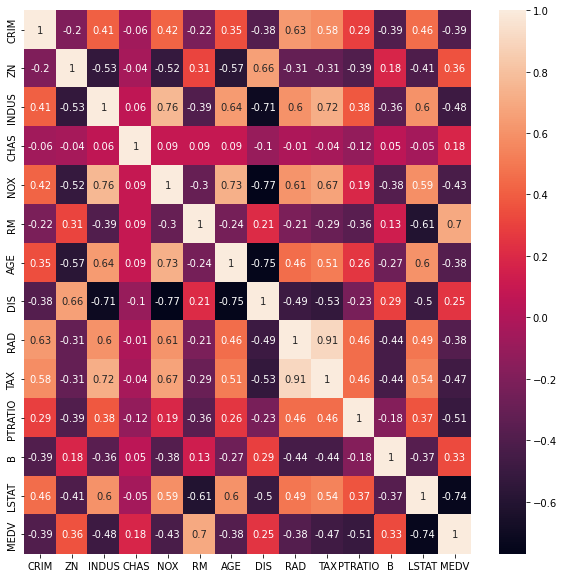

In [65]:
sns.heatmap(data=correlation_matrix_boston, annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

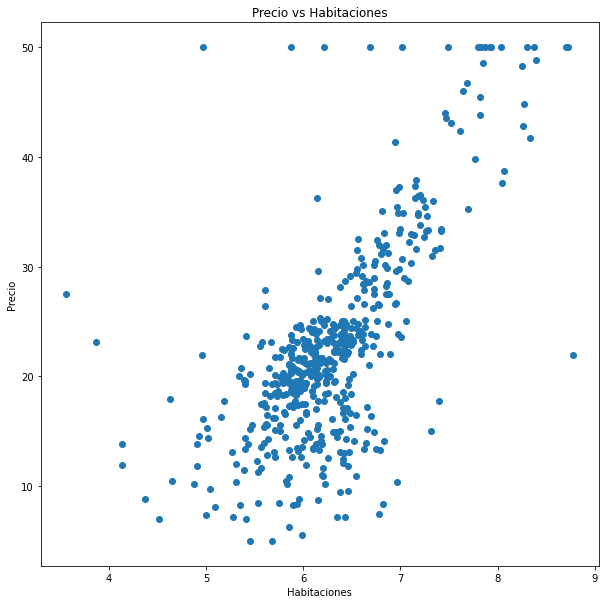

In [67]:
plt.scatter(dfBoston['RM'], dfBoston['MEDV'])
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

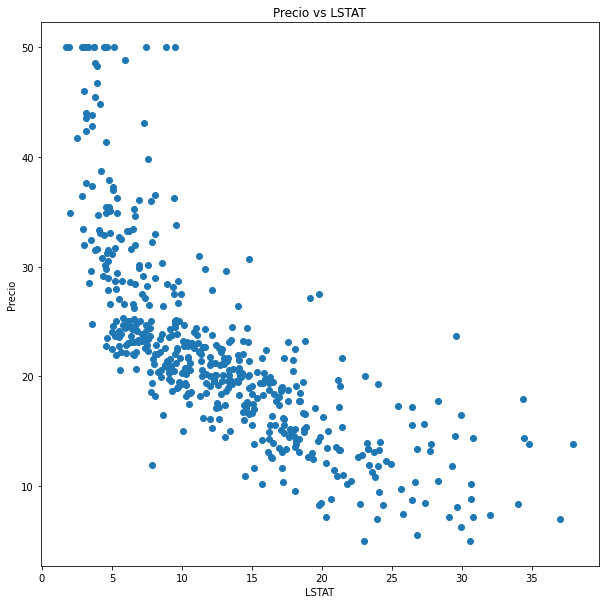

In [68]:
plt.scatter(dfBoston['LSTAT'], dfBoston['MEDV'])
plt.title('Precio vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Precio')
plt.show()

In [74]:
print('Máximo valor {}'.format(dfBoston['MEDV'].max()))
print('Mínimo valor {}'.format(dfBoston['MEDV'].min()))
print('Mean {}'.format(round(dfBoston['MEDV'].mean(), 2)))
print('Media {}'.format(dfBoston['MEDV'].median()))
print('Std {}'.format(round(dfBoston['MEDV'].std(), 2)))

Máximo valor 50.0
Mínimo valor 5.0
Mean 22.53
Media 21.2
Std 9.2


In [75]:
x_featureRM = dfBoston['RM']
y_priceMDEV = dfBoston['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x_featureRM, y_priceMDEV, test_size = 0.2, random_state = 42)

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404,)
(404,)
(102,)
(102,)


In [79]:
x_train = x_train.values.reshape(-1,1)
lin_model_boston = LinearRegression()
lin_model_boston.fit(x_train, y_train)

LinearRegression()

In [80]:
print('Coeficiente: ', lin_model_boston.coef_)
print('Término independiente: ', lin_model_boston.intercept_)

Coeficiente:  [9.34830141]
Término independiente:  -36.24631889813795


In [81]:
y_train_predict = lin_model_boston.predict(x_train)

In [82]:
r2 = r2_score(y_train, y_train_predict)
print('R2 score: ', r2)

R2 score:  0.5050658352776293


In [87]:
#x_test = x_test.values.reshape(-1,1)
y_test_predict = lin_model_boston.predict(x_test)

In [89]:
r2 = r2_score(y_test, y_test_predict)
print('R2 score: ', r2)

R2 score:  0.3707569232254778


In [92]:
predicted_data_boston = lin_model_boston.predict(dfBoston[['RM']])
predicted_data_boston[0:5]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([25.21876285, 23.77912443, 30.92122671, 29.17309434, 30.56599125])

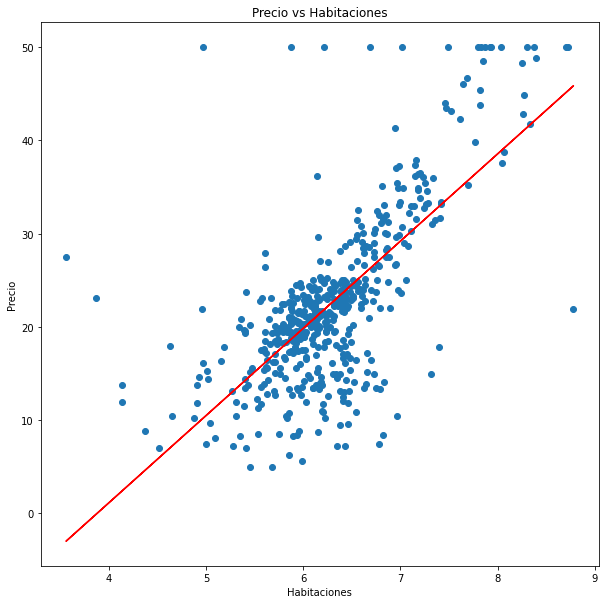

In [94]:
plt.scatter(dfBoston['RM'], dfBoston['MEDV'])
plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

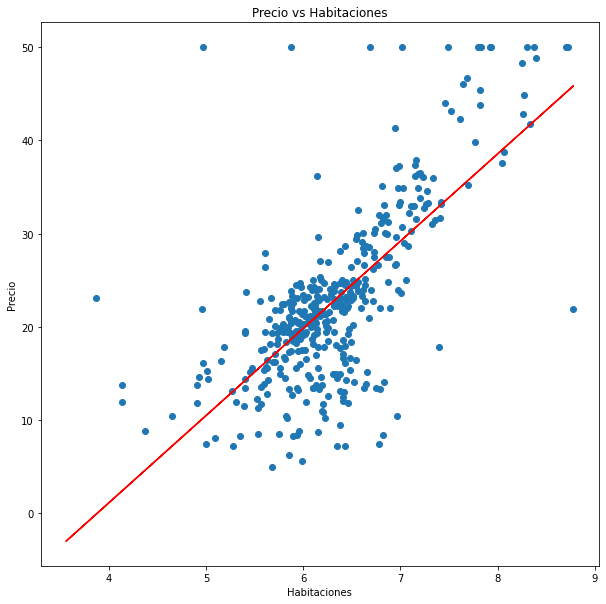

In [96]:
plt.scatter(x_train, y_train)
plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

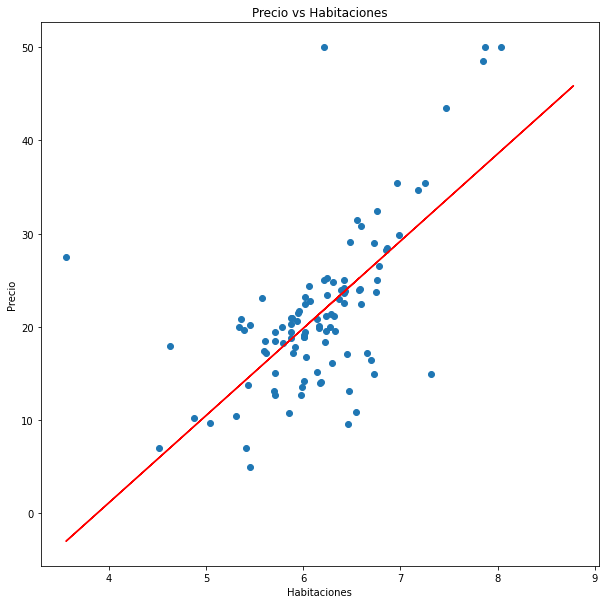

In [97]:
plt.scatter(x_test, y_test)
plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.show()

In [99]:
dfAP = pd.DataFrame({'Actual':dfBoston['MEDV'], 'Predicción': predicted_data_boston})
dfAP.head(10)

,Actual,Predicción
0,24.0,25.218763
1,21.6,23.779124
2,34.7,30.921227
3,33.4,29.173094
4,36.2,30.565991
5,28.7,23.863259
6,22.9,19.955669
7,27.1,21.451397
8,16.5,16.393966
9,18.9,19.880883


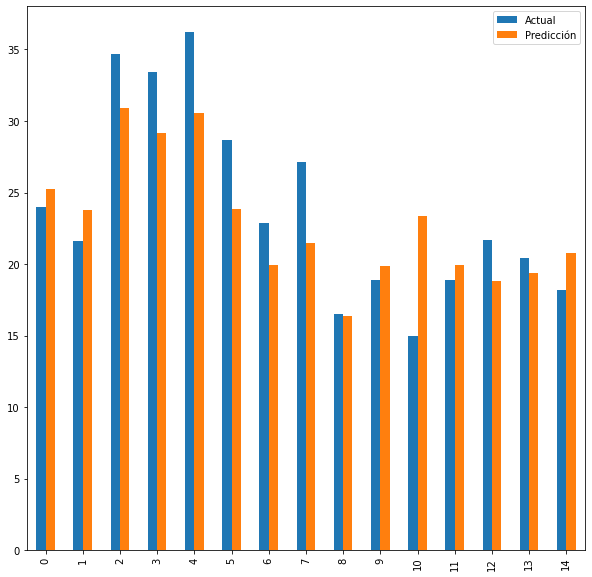

In [100]:
dfAP.head(15).plot(kind='bar')
plt.show()